In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(25979, 184)

In [4]:
list(data.columns)

['Unnamed: 0',
 'id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10'

In [5]:
X = data.loc[:, 'B365H':].drop(columns=['index_x', 'index_y'])

In [6]:
X.shape

(25979, 96)

In [7]:
def func(line):
    if line['home_team_goal'] > line['away_team_goal']:
        return 1
    elif line['home_team_goal'] < line['away_team_goal']:
        return -1
    return 0

In [8]:
y = data.apply(func, axis=1)
print(y.shape)
print(y.value_counts())

(25979,)
 1    11917
-1     7466
 0     6596
dtype: int64


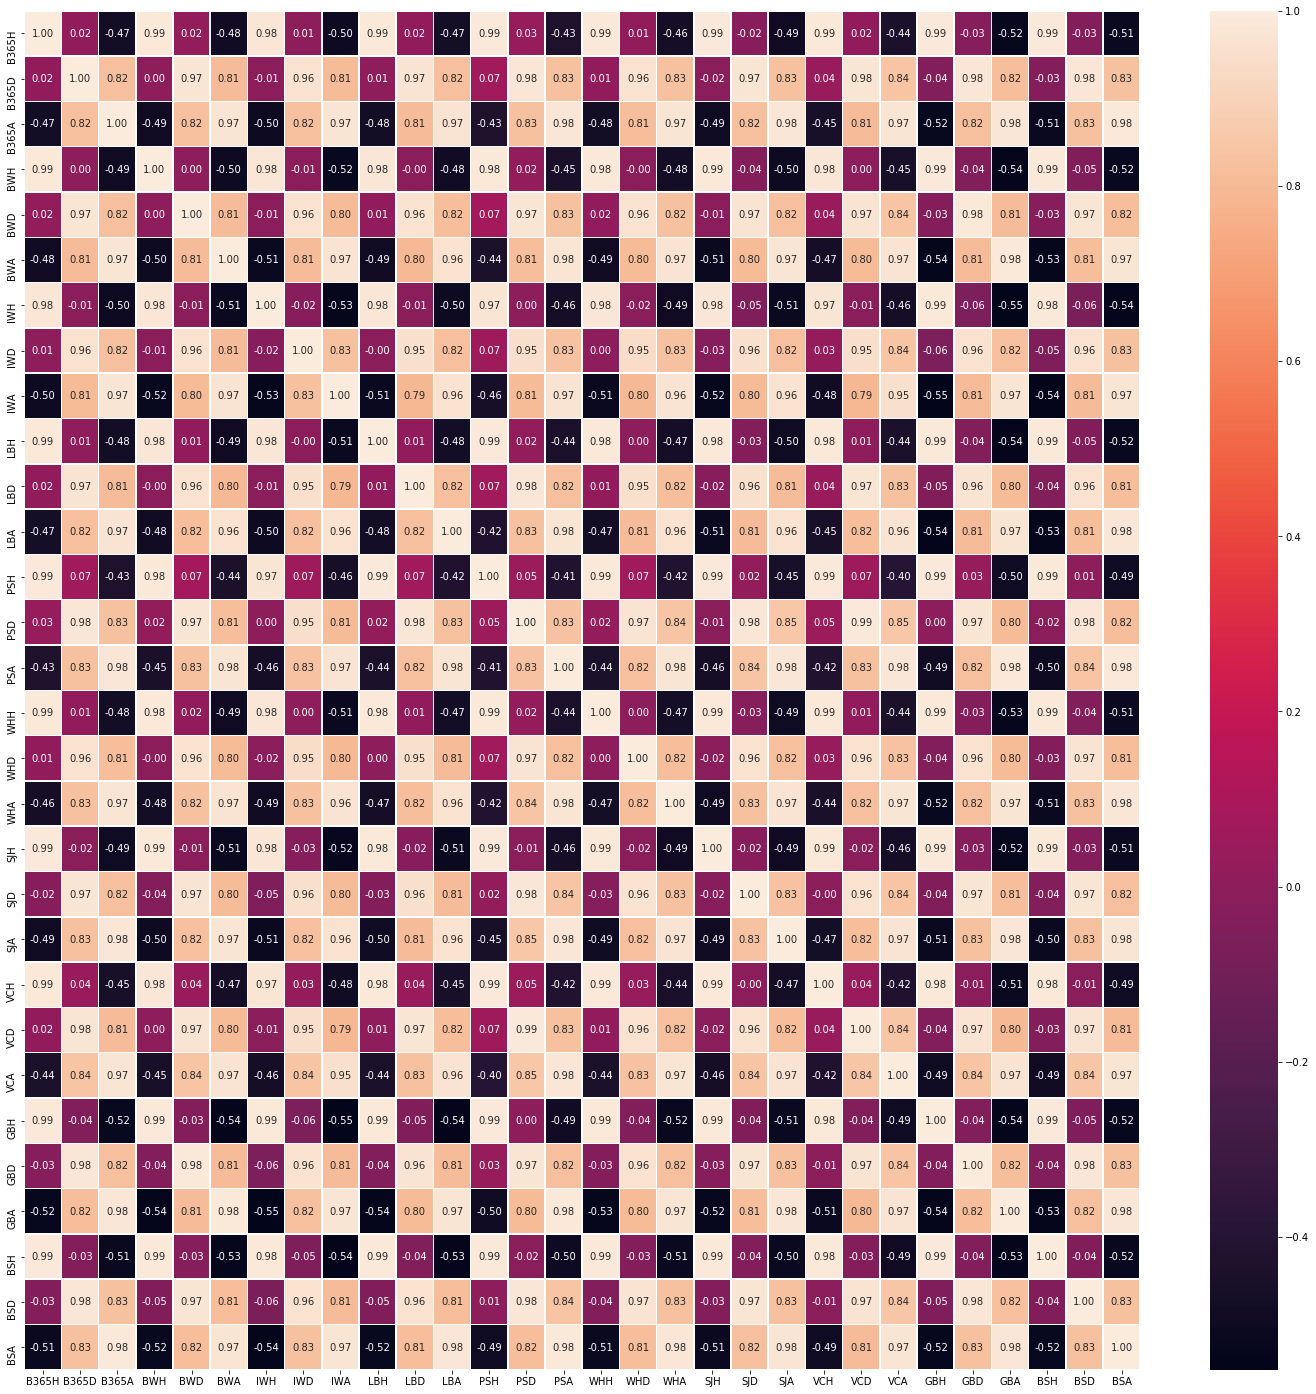

In [9]:
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(X.loc[:,'B365H':'BSA'].corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

ставки сильно коррелируют между собой, поэтому оставляем только 'B365H', 'B365D', 'B365A'

In [10]:
columns_drop = ['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 
                'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 
                'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
X = X.drop(columns=columns_drop)

Далле выкинул ещё несколько признаков.\
Где-то за кадром я обучался и с этими признаки, но некоторые или мешают обучаться ("*_count" и "*_result_i" признаки),\
или в случае с "overall_rating_*" признаками я вместо них оставил их линейные комбинации - "_defence_avr" и т.д. признаки

In [11]:
X = X.drop(columns=['home_goalkepper_count', 'away_goalkepper_count'])
X = X.drop(columns=['home_defence_count', 'away_defence_count', 'home_midfield_count', 
                    'away_midfield_count', 'home_attack_count', 'away_attack_count'])
columns_drop = ['overall_rating_home_player_1', 'overall_rating_home_player_2', 
                'overall_rating_home_player_3', 'overall_rating_home_player_4',
                'overall_rating_home_player_5', 'overall_rating_home_player_6',
                'overall_rating_home_player_7', 'overall_rating_home_player_8',
                'overall_rating_home_player_9', 'overall_rating_home_player_10',
                'overall_rating_home_player_11', 'overall_rating_away_player_1',
                'overall_rating_away_player_2', 'overall_rating_away_player_3',
                'overall_rating_away_player_4', 'overall_rating_away_player_5',
                'overall_rating_away_player_6', 'overall_rating_away_player_7',
                'overall_rating_away_player_8', 'overall_rating_away_player_9',
                'overall_rating_away_player_10', 'overall_rating_away_player_11']
X = X.drop(columns=columns_drop)
X = X.drop(columns=list(filter(lambda col: 'result' in col, list(X.columns))))

In [12]:
list(X.columns)

['B365H',
 'B365D',
 'B365A',
 'home_team_buildUpPlaySpeed',
 'away_team_buildUpPlaySpeed',
 'home_team_buildUpPlayDribbling',
 'away_team_buildUpPlayDribbling',
 'home_team_buildUpPlayPassing',
 'away_team_buildUpPlayPassing',
 'home_team_chanceCreationPassing',
 'away_team_chanceCreationPassing',
 'home_team_chanceCreationCrossing',
 'away_team_chanceCreationCrossing',
 'home_team_chanceCreationShooting',
 'away_team_chanceCreationShooting',
 'home_team_defencePressure',
 'away_team_defencePressure',
 'home_team_defenceAggression',
 'away_team_defenceAggression',
 'home_team_defenceTeamWidth',
 'away_team_defenceTeamWidth',
 'home_goalkepper_avr',
 'home_defence_avr',
 'home_midfield_avr',
 'home_attack_avr',
 'away_goalkepper_avr',
 'away_defence_avr',
 'away_midfield_avr',
 'away_attack_avr']

In [13]:
X.shape

(25979, 29)

In [14]:
X.isnull().any(axis=1).sum()

4377

In [15]:
mask = ~X.isnull().any(axis=1)
X = X[mask]
y = y[mask]

In [16]:
X.shape, y.shape

((21602, 29), (21602,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15121, 29), (15121,), (6481, 29), (6481,))

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
def plot_2(means, x_values, xlabel, ylabel, title, legend='', is_log_scale=False):
    fig, axs = plt.subplots(figsize=(15, 8))
    if len(means.shape) == 1:
        axs.plot(x_values, means, label=legend)
    else:
        for i in range(means.shape[0]):
            axs.plot(x_values, means[i], label=legend[i])
    axs.legend()
    if is_log_scale:
        axs.set_xscale('log')
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(title)
    return axs

## KNN

No handles with labels found to put in legend.


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=200, p=2,
                     weights='uniform')
Оптимальное количество соседей:  200


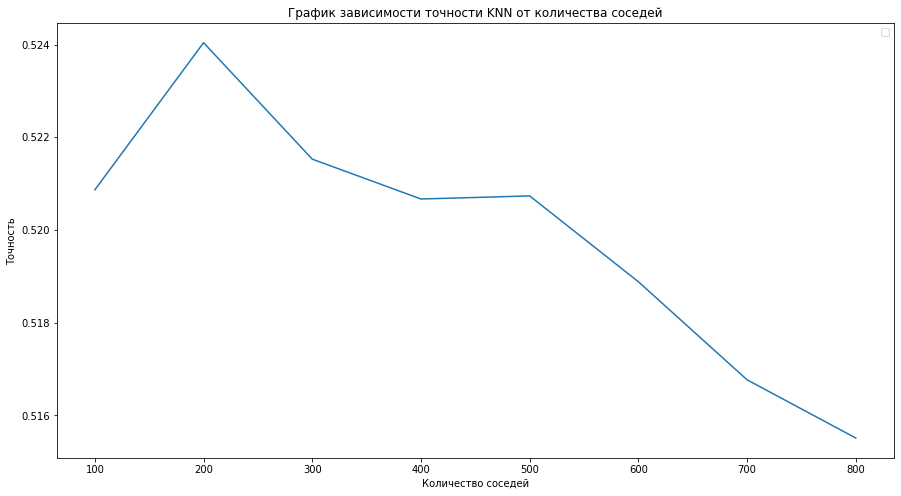

In [22]:
param_grid_knn = {'n_neighbors': np.array([100, 200, 300, 400, 500, 600, 700, 800])}
searcher_knn = GridSearchCV(KNN(algorithm='kd_tree', n_jobs=-1), 
                            param_grid_knn, cv=5, scoring='accuracy')
searcher_knn.fit(X_train_scaled, y_train)
print(searcher_knn.best_estimator_)
print('Оптимальное количество соседей: ', searcher_knn.best_estimator_.n_neighbors)
df_knn_searcher_result = pd.DataFrame(searcher_knn.cv_results_)
plot_2(means=df_knn_searcher_result['mean_test_score'], 
       x_values=df_knn_searcher_result['param_n_neighbors'].values.tolist(), 
       xlabel='Количество соседей', ylabel='Точность', 
       title='График зависимости точности KNN от количества соседей')

No handles with labels found to put in legend.


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=150, p=2,
                     weights='uniform')
Оптимальное количество соседей:  150


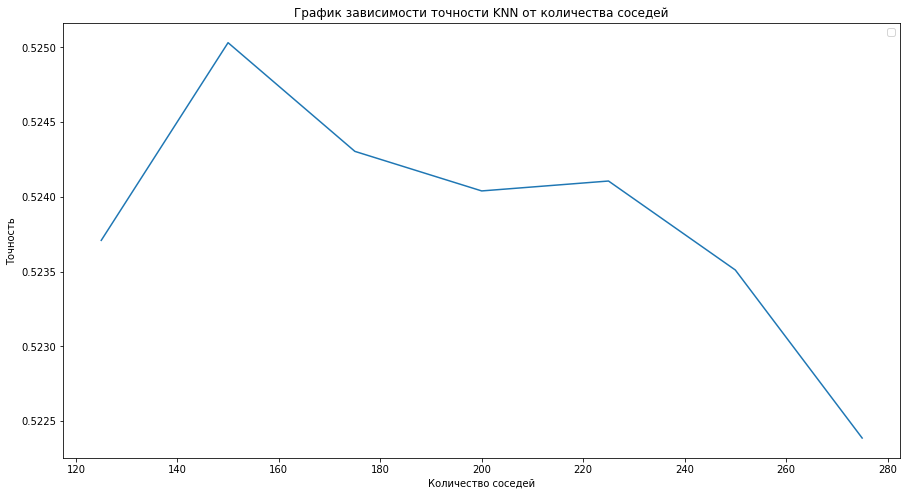

In [23]:
param_grid_knn = {'n_neighbors': np.array([125, 150, 175, 200, 225, 250, 275])}
searcher_knn = GridSearchCV(KNN(algorithm='kd_tree', n_jobs=-1), 
                            param_grid_knn, cv=5, scoring='accuracy')
searcher_knn.fit(X_train_scaled, y_train)
print(searcher_knn.best_estimator_)
print('Оптимальное количество соседей: ', searcher_knn.best_estimator_.n_neighbors)
df_knn_searcher_result = pd.DataFrame(searcher_knn.cv_results_)
plot_2(means=df_knn_searcher_result['mean_test_score'], 
       x_values=df_knn_searcher_result['param_n_neighbors'].values.tolist(), 
       xlabel= 'Количество соседей', ylabel='Точность', 
       title='График зависимости точности KNN от количества соседей')

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=150, p=1,
                     weights='uniform')
Оптимальное количество соседей: 150, оптимальное p: 1


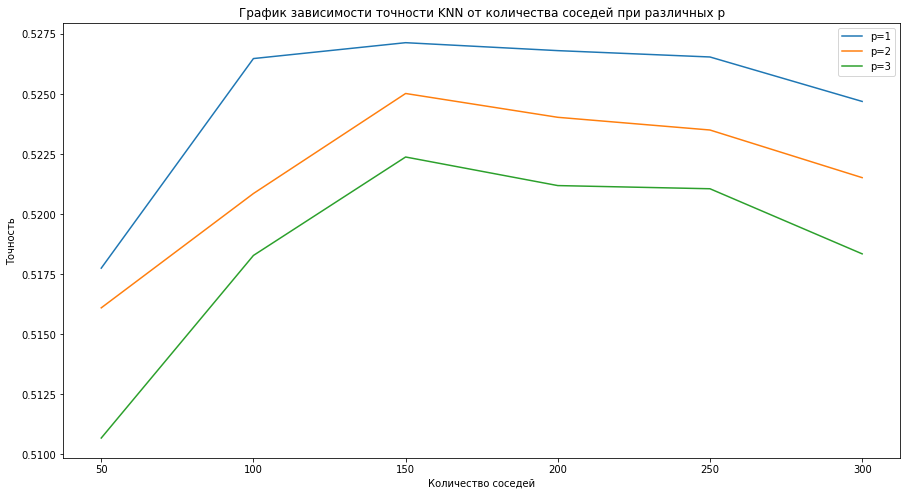

In [24]:
param_grid_knn_several = {'n_neighbors': np.array([50, 100, 150, 200, 250, 300]),
                          'p': np.array([1, 2, 3])}
searcher_knn_several  = GridSearchCV(KNN(algorithm='kd_tree', n_jobs=-1), 
                                     param_grid_knn_several , cv=5, scoring='accuracy')
searcher_knn_several.fit(X_train_scaled , y_train)
print(searcher_knn_several.best_estimator_)
print('Оптимальное количество соседей: {0}, оптимальное p: {1}'.format(
    searcher_knn_several.best_estimator_.n_neighbors, searcher_knn_several.best_estimator_.p))
df_knn_searcher_several_result = pd.DataFrame(searcher_knn_several.cv_results_)
plot_2(means=np.array(
    [df_knn_searcher_several_result[df_knn_searcher_several_result['param_p'] == i]['mean_test_score'] 
     for i in param_grid_knn_several['p']]), 
       x_values=param_grid_knn_several['n_neighbors'], 
       xlabel='Количество соседей', ylabel='Точность', 
       title='График зависимости точности KNN от количества соседей при различных p', 
       legend=['p=' + str(p) for p in param_grid_knn_several['p']])

In [26]:
max_acc_knn = df_knn_searcher_several_result[
    df_knn_searcher_several_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность метода KNN:', max_acc_knn)

Максимальная точность метода KNN: [0.52714727]


## sgd_classifier

No handles with labels found to put in legend.


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=83, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Оптимальная оптимизируемая функция: hinge


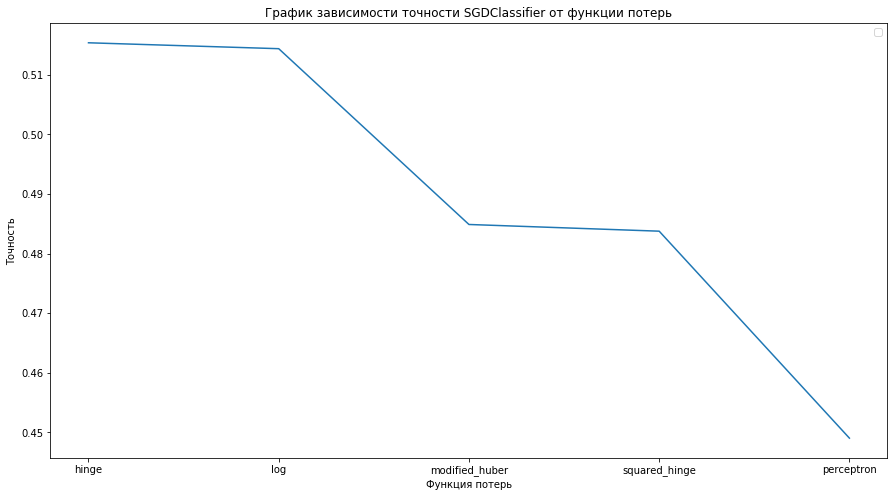

In [27]:
param_grid_sgd_classifier = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
searcher_sgd_classifier = GridSearchCV(SGDClassifier(random_state=83, max_iter=10000), 
                                                param_grid_sgd_classifier, cv=5, scoring='accuracy')
searcher_sgd_classifier.fit(X_train_scaled, y_train)
print(searcher_sgd_classifier.best_estimator_)
print('Оптимальная оптимизируемая функция:', searcher_sgd_classifier.best_estimator_.loss)
df_sgd_searcher_result = pd.DataFrame(searcher_sgd_classifier.cv_results_)
plot_2(means=df_sgd_searcher_result['mean_test_score'], 
       x_values=df_sgd_searcher_result['param_loss'].values.tolist(), 
       xlabel='Функция потерь', ylabel='Точность', 
       title='График зависимости точности SGDClassifier от функции потерь')

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=83, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
Оптимальная оптимизируемая функция: hinge, оптимальный penalty: elasticnet


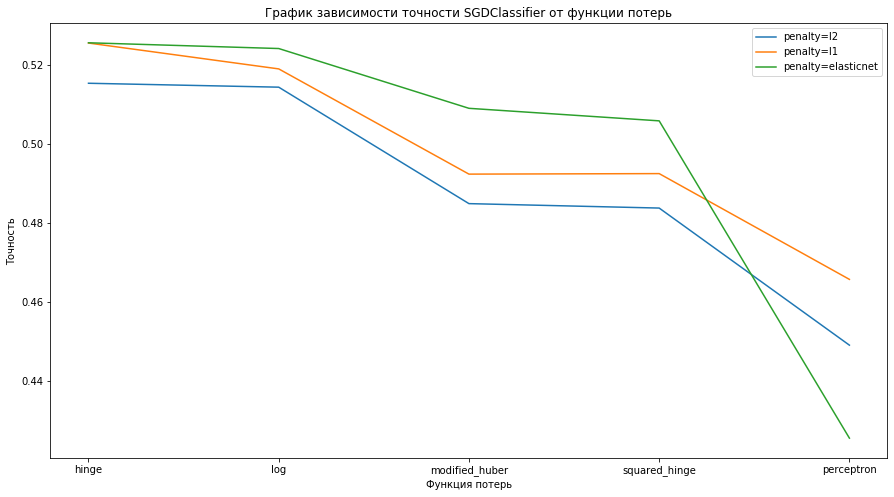

In [28]:
param_grid_sgd_classifier_several = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                                     'penalty': ['l2', 'l1', 'elasticnet']}
searcher_sgd_classifier_several = GridSearchCV(SGDClassifier(random_state=83, max_iter=10000), 
                                                param_grid_sgd_classifier_several, cv=5, scoring='accuracy')
searcher_sgd_classifier_several.fit(X_train_scaled, y_train)
print(searcher_sgd_classifier_several.best_estimator_)
print('Оптимальная оптимизируемая функция: {0}, оптимальный penalty: {1}'.format(
    searcher_sgd_classifier_several.best_estimator_.loss,
    searcher_sgd_classifier_several.best_estimator_.penalty))
df_sgd_searcher_several_result = pd.DataFrame(searcher_sgd_classifier_several.cv_results_)
plot_2(means=np.array(
    [df_sgd_searcher_several_result[df_sgd_searcher_several_result['param_penalty'] == penalty]['mean_test_score'] 
     for penalty in param_grid_sgd_classifier_several['penalty']]), 
       x_values=param_grid_sgd_classifier_several['loss'], 
       xlabel='Функция потерь', ylabel='Точность', 
       title='График зависимости точности SGDClassifier от функции потерь', 
       legend=['penalty=' + penalty for penalty in param_grid_sgd_classifier_several['penalty']])

In [29]:
max_acc_sgd = df_sgd_searcher_several_result[
    df_sgd_searcher_several_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность метода SGDClassifier:', max_acc_sgd)

Максимальная точность метода SGDClassifier: [0.52562648]


## decision_tree

No handles with labels found to put in legend.


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=83, splitter='best')
Оптимальная максимальная глубина: 5


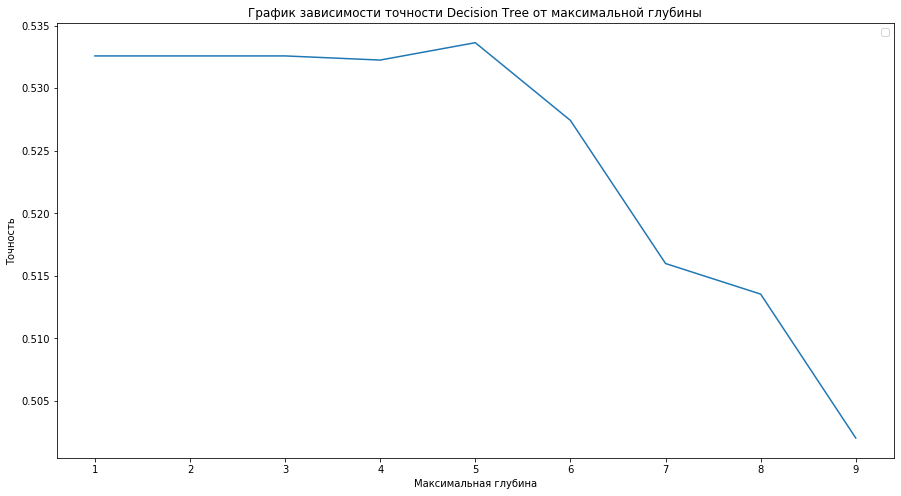

In [30]:
param_grid_decision_tree = [{'max_depth': np.arange(1, 10)}]
searcher_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=83), 
                                                param_grid_decision_tree, cv=5, scoring='accuracy')
searcher_decision_tree.fit(X_train_scaled, y_train)
print(searcher_decision_tree.best_estimator_)
print('Оптимальная максимальная глубина:', searcher_decision_tree.best_estimator_.max_depth)
df_decision_tree_searcher_result = pd.DataFrame(searcher_decision_tree.cv_results_)
plot_2(means=df_decision_tree_searcher_result['mean_test_score'], 
       x_values=df_decision_tree_searcher_result['param_max_depth'].values.tolist(), 
       xlabel='Максимальная глубина', ylabel='Точность', 
       title='График зависимости точности Decision Tree от максимальной глубины', legend='')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=83, splitter='best')
Оптимальная максимальная глубина: 4, оптимальнаый критерий разбиения: entropy


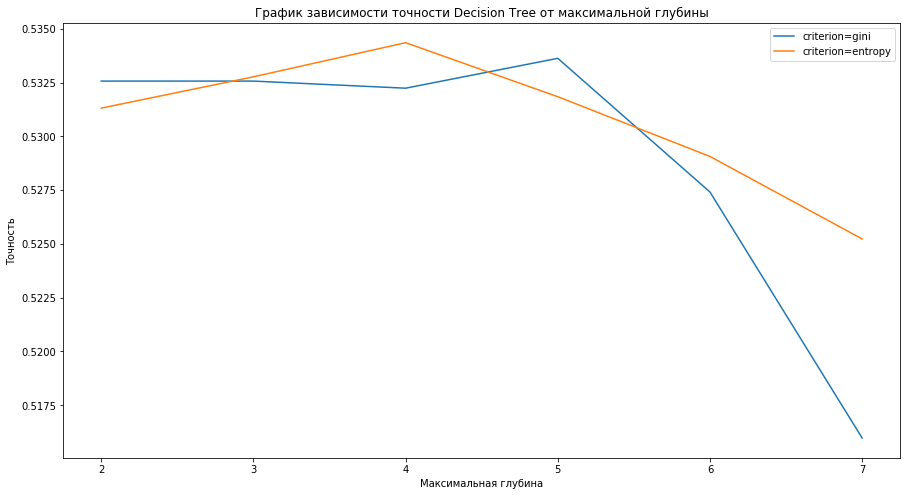

In [31]:
param_grid_decision_tree_several = {'max_depth': np.arange(2, 8), 'criterion': ['gini', 'entropy']}
searcher_decision_tree_several = GridSearchCV(DecisionTreeClassifier(random_state=83), 
                                                param_grid_decision_tree_several, cv=5, scoring='accuracy')
searcher_decision_tree_several.fit(X_train_scaled, y_train)
print(searcher_decision_tree_several.best_estimator_)
print('Оптимальная максимальная глубина: {0}, оптимальнаый критерий разбиения: {1}'.format(
    searcher_decision_tree_several.best_estimator_.max_depth,
    searcher_decision_tree_several.best_estimator_.criterion))
df_decision_tree_several_searcher_result = pd.DataFrame(searcher_decision_tree_several.cv_results_)
plot_2(means=np.array([
    df_decision_tree_several_searcher_result[
        df_decision_tree_several_searcher_result['param_criterion'] == criterion]['mean_test_score'] 
     for criterion in param_grid_decision_tree_several['criterion']
]), 
       x_values=param_grid_decision_tree_several['max_depth'], 
       xlabel='Максимальная глубина', ylabel='Точность', 
       title='График зависимости точности Decision Tree от максимальной глубины', 
       legend=['criterion=' + criterion for criterion in param_grid_decision_tree_several['criterion']])

In [32]:
max_acc_dec_tree = df_decision_tree_several_searcher_result[
    df_decision_tree_several_searcher_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность метода Decision Tree:', max_acc_dec_tree)

Максимальная точность метода Decision Tree: [0.53435537]


## RandomForest

No handles with labels found to put in legend.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=93, verbose=0,
                       warm_start=False)
Оптимальное количество деревьев:  250


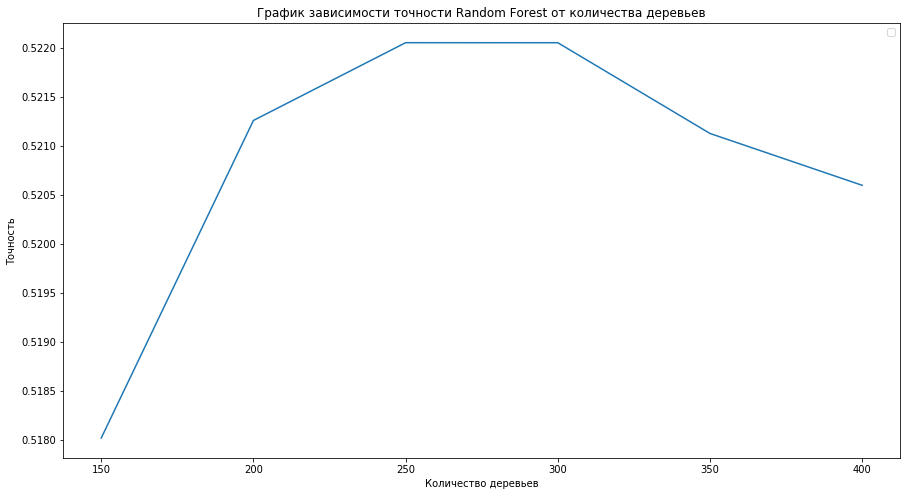

In [33]:
param_grid_forest = {'n_estimators': np.array([150, 200, 250, 300, 350, 400])}
searcher_forest = GridSearchCV(RandomForestClassifier(random_state=93, n_jobs=-1), 
                               param_grid_forest, cv=5, scoring='accuracy')
searcher_forest.fit(X_train_scaled, y_train)
print(searcher_forest.best_estimator_)
print('Оптимальное количество деревьев: ', searcher_forest.best_estimator_.n_estimators)
df_forest_searcher_result = pd.DataFrame(searcher_forest.cv_results_)
plot_2(means=df_forest_searcher_result['mean_test_score'], 
       x_values=df_forest_searcher_result['param_n_estimators'].values.tolist(), 
       xlabel='Количество деревьев', ylabel='Точность', 
       title='График зависимости точности Random Forest от количества деревьев', 
       legend='')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=93, verbose=0,
                       warm_start=False)
Оптимальное количество деревьев: 150, оптимальная глубина: 8


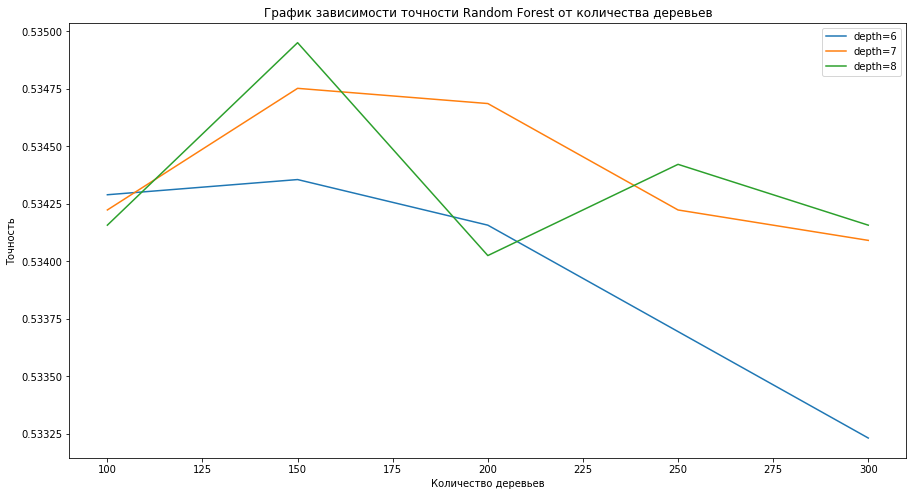

In [34]:
param_grid_several_forest = {'n_estimators': np.array([100, 150, 200, 250, 300]), 
                             'max_depth': np.arange(6, 9, 1)}
searcher_forest_several = GridSearchCV(RandomForestClassifier(random_state=93, n_jobs=-1), 
                               param_grid_several_forest, cv=5, scoring='accuracy')
searcher_forest_several.fit(X_train_scaled, y_train)
print(searcher_forest_several.best_estimator_)
print('Оптимальное количество деревьев: {0}, оптимальная глубина: {1}'.format(
    searcher_forest_several.best_estimator_.n_estimators, 
    searcher_forest_several.best_estimator_.max_depth))
df_forest_searcher_several_result = pd.DataFrame(searcher_forest_several.cv_results_)
plot_2(means=np.array(
    [df_forest_searcher_several_result[df_forest_searcher_several_result['param_max_depth'] == criterion]['mean_test_score'] 
     for criterion in param_grid_several_forest['max_depth']]), 
       x_values=param_grid_several_forest['n_estimators'], 
       xlabel='Количество деревьев', ylabel='Точность', 
       title='График зависимости точности Random Forest от количества деревьев', 
       legend=['depth=' + str(depth) for depth in param_grid_several_forest['max_depth']])

In [35]:
max_acc_random_forest = df_forest_searcher_several_result[
    df_forest_searcher_several_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность метода Random Forest:', max_acc_random_forest)

Максимальная точность метода Random Forest: [0.53495083]


## SVM

In [36]:
simplefilter('ignore', category=ConvergenceWarning)

### linear

No handles with labels found to put in legend.


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=5000, probability=False, random_state=22, shrinking=True,
    tol=0.001, verbose=False)
Оптимальное C:  0.01


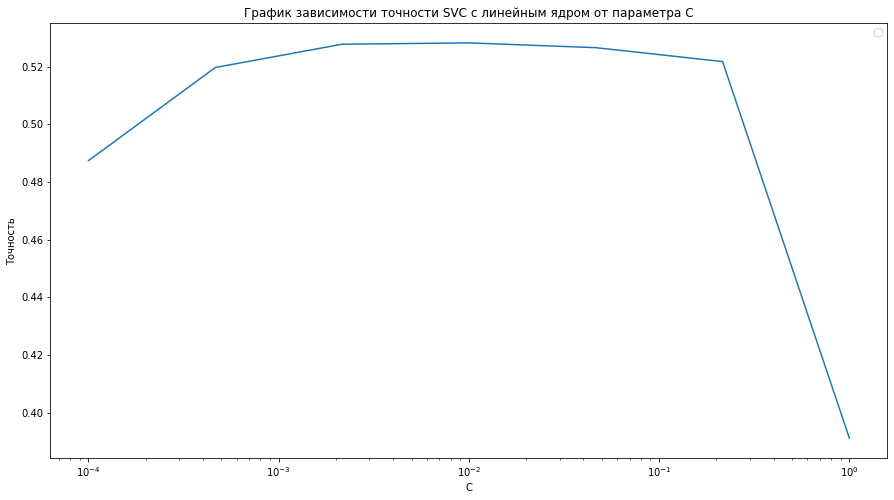

In [37]:
param_grid_svc = {'C': np.logspace(-4, 0, 7)}
searcher_svc = GridSearchCV(SVC(kernel='linear', random_state=22, max_iter=5000), 
                               param_grid_svc, cv=5, scoring='accuracy')
searcher_svc.fit(X_train_scaled, y_train)
print(searcher_svc.best_estimator_)
print('Оптимальное C: ', searcher_svc.best_estimator_.C)
df_svc_searcher_result = pd.DataFrame(searcher_svc.cv_results_)
plot_2(means=df_svc_searcher_result['mean_test_score'], 
       x_values=df_svc_searcher_result['param_C'].values.tolist(), 
       xlabel='C', ylabel='Точность', 
       title='График зависимости точности SVC с линейным ядром от параметра C', 
       legend='', is_log_scale=True)

In [38]:
max_acc_lin_svc = df_svc_searcher_result[
    df_svc_searcher_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность SVC с линейным ядром:', max_acc_lin_svc)

Максимальная точность SVC с линейным ядром: [0.5282055]


### poly

SVC(C=0.31622776601683794, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=5000, probability=False, random_state=22,
    shrinking=True, tol=0.001, verbose=False)
Оптимальное C: 0.31622776601683794, оптимальная степень: 3


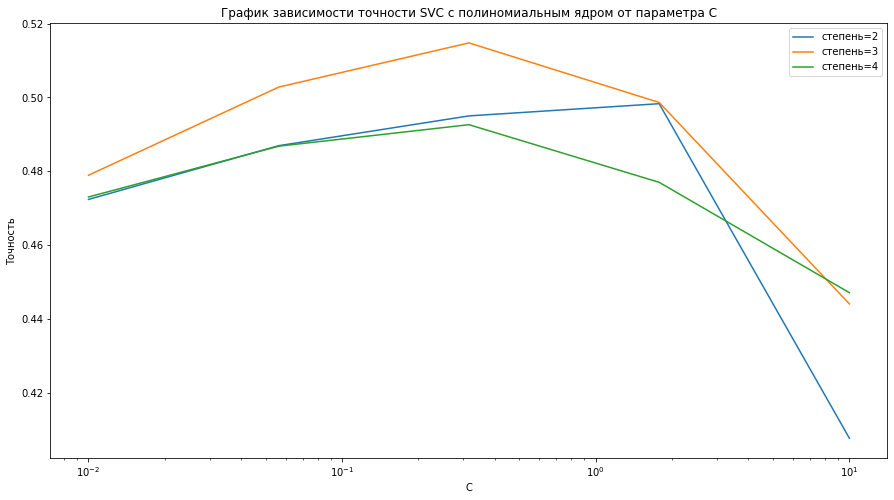

In [39]:
param_grid_svc_poly = {'C': np.logspace(-2, 1, 5), 
                  'degree': [2, 3, 4]}
searcher_svc_poly = GridSearchCV(SVC(kernel='poly', random_state=22, max_iter=5000), 
                               param_grid_svc_poly, cv=5, scoring='accuracy')
searcher_svc_poly.fit(X_train_scaled, y_train)
print(searcher_svc_poly.best_estimator_)
print('Оптимальное C: {0}, оптимальная степень: {1}'.format(
    searcher_svc_poly.best_estimator_.C, searcher_svc_poly.best_estimator_.degree))
df_svc_searcher_poly_result = pd.DataFrame(searcher_svc_poly.cv_results_)
plot_2(means=np.array(
    [df_svc_searcher_poly_result[df_svc_searcher_poly_result['param_degree'] == degree]['mean_test_score'] 
     for degree in param_grid_svc_poly['degree']]), 
       x_values=param_grid_svc_poly['C'], 
       xlabel='C', ylabel='Точность', 
       title='График зависимости точности SVC с полиномиальным ядром от параметра C', 
       legend=['степень=' + str(degree) for degree in param_grid_svc_poly['degree']], 
       is_log_scale=True)

In [40]:
max_acc_poly_svc = df_svc_searcher_poly_result[
    df_svc_searcher_poly_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность SVC с полиномиальным ядром:', max_acc_poly_svc)

Максимальная точность SVC с полиномиальным ядром: [0.51478099]


### sigmoid kernel

No handles with labels found to put in legend.


SVC(C=0.039810717055349734, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='sigmoid', max_iter=5000, probability=False, random_state=22,
    shrinking=True, tol=0.001, verbose=False)
Оптимальное C:  0.039810717055349734


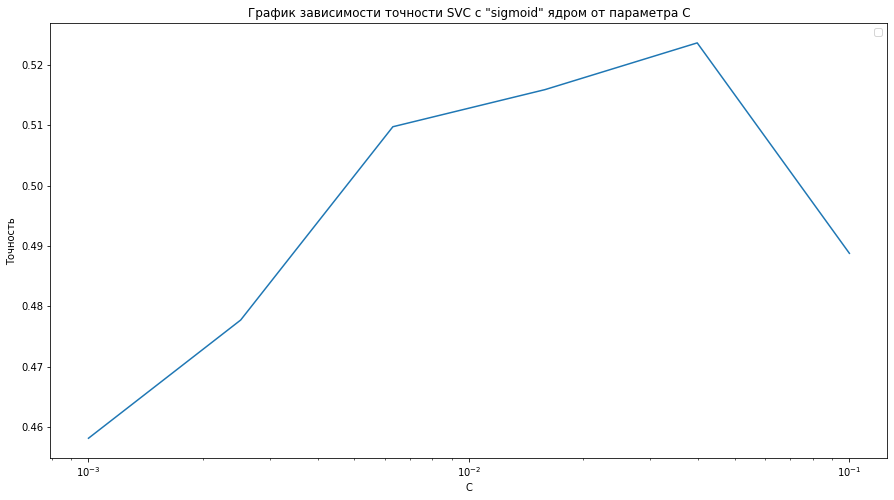

In [41]:
param_grid_svc_sigmoid = {'C': np.logspace(-3, -1, 6)}
searcher_svc_sigmoid = GridSearchCV(SVC(kernel='sigmoid', random_state=22, max_iter=5000), 
                               param_grid_svc_sigmoid, cv=5, scoring='accuracy')
searcher_svc_sigmoid.fit(X_train_scaled, y_train)
print(searcher_svc_sigmoid.best_estimator_)
print('Оптимальное C: ', searcher_svc_sigmoid.best_estimator_.C)
df_svc_searcher_sigmoid_result = pd.DataFrame(searcher_svc_sigmoid.cv_results_)
plot_2(means=df_svc_searcher_sigmoid_result['mean_test_score'], 
       x_values=df_svc_searcher_sigmoid_result['param_C'].values.tolist(), 
       xlabel='C', ylabel='Точность', 
       title='График зависимости точности SVC с "sigmoid" ядром от параметра C', 
       legend='', is_log_scale=True)

In [42]:
max_acc_sigmoid_svc = df_svc_searcher_sigmoid_result[
    df_svc_searcher_sigmoid_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность SVC с "sigmoid" ядром:', max_acc_sigmoid_svc)

Максимальная точность SVC с "sigmoid" ядром: [0.52364194]


### rbf kernel

No handles with labels found to put in legend.


SVC(C=0.630957344480193, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=5000, probability=False, random_state=22,
    shrinking=True, tol=0.001, verbose=False)
Оптимальное C:  0.630957344480193


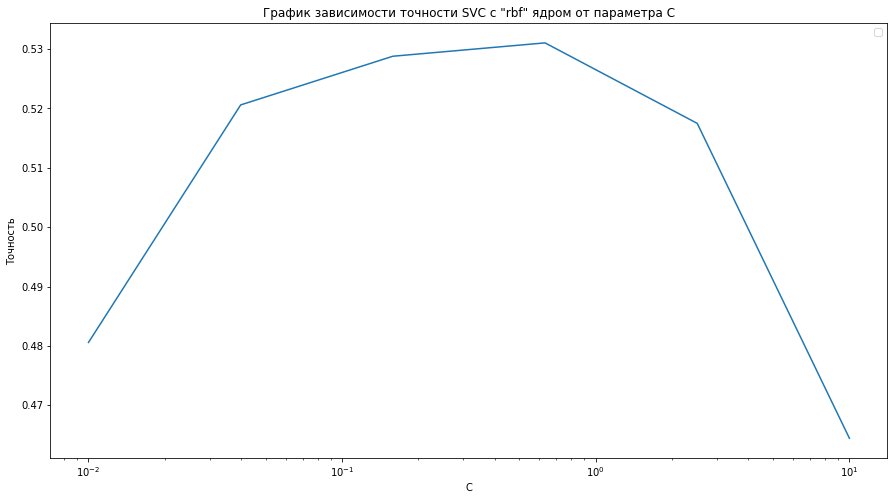

In [43]:
param_grid_svc_rbf = {'C': np.logspace(-2, 1, 6)}
searcher_svc_rbf = GridSearchCV(SVC(kernel='rbf', random_state=22, max_iter=5000), 
                               param_grid_svc_rbf, cv=5, scoring='accuracy')
searcher_svc_rbf.fit(X_train_scaled, y_train)
print(searcher_svc_rbf.best_estimator_)
print('Оптимальное C: ', searcher_svc_rbf.best_estimator_.C)
df_svc_searcher_rbf_result = pd.DataFrame(searcher_svc_rbf.cv_results_)
plot_2(means=df_svc_searcher_rbf_result['mean_test_score'], 
       x_values=df_svc_searcher_rbf_result['param_C'].values.tolist(), 
       xlabel='C', ylabel='Точность', 
       title='График зависимости точности SVC с "rbf" ядром от параметра C', 
       legend='', is_log_scale=True)

In [56]:
max_acc_rbf_svc = df_svc_searcher_rbf_result[
    df_svc_searcher_rbf_result['rank_test_score'] == 1]['mean_test_score'].values
print('Максимальная точность SVC с "rbf" ядром:', max_acc_rbf_svc)

Максимальная точность SVC с "rbf" ядром: [0.53104924]


In [57]:
max_acc_svc = max(max_acc_rbf_svc, max_acc_sigmoid_svc, max_acc_poly_svc, max_acc_lin_svc)
max_acc_svc

array([0.53104924])

In [58]:
train_result = {'KNN': max_acc_knn[0], 'SGD': max_acc_sgd[0], 'Decision Tree': max_acc_dec_tree[0], 
                'Random Forest': max_acc_random_forest[0], 'SVM': max_acc_svc[0]}

(0.52, 0.5359508286326469)

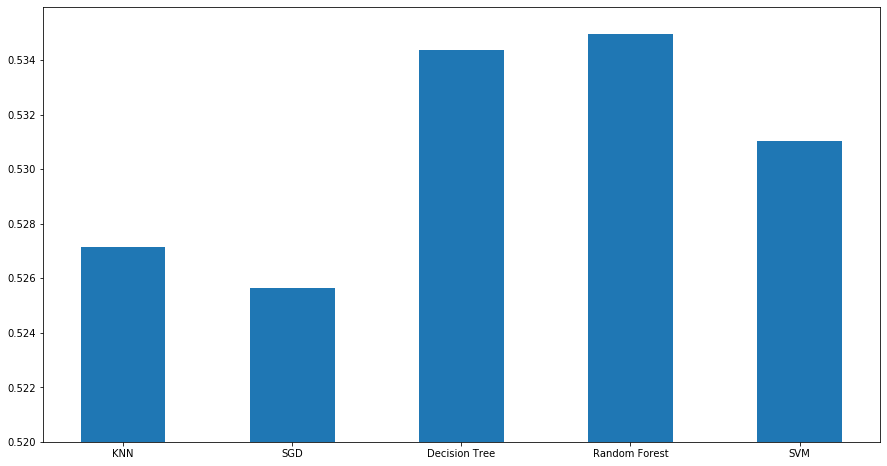

In [59]:
fig, axs = plt.subplots(figsize=(15, 8))
xticks = np.arange(len(train_result))
axs.bar(xticks, train_result.values(), align='center', width=0.5)
axs.set_xticks(xticks)
axs.set_xticklabels(train_result.keys())
axs.set_ylim(0.52, max(train_result.values()) + 0.001)

In [60]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

0.5256904798642185
              precision    recall  f1-score   support

          -1       0.49      0.46      0.48      1893
           0       0.25      0.00      0.00      1619
           1       0.54      0.85      0.66      2969

    accuracy                           0.53      6481
   macro avg       0.43      0.44      0.38      6481
weighted avg       0.45      0.53      0.44      6481

Confusion matrix, without normalization


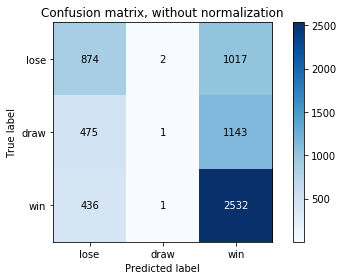

In [63]:
m = searcher_forest_several.best_estimator_
m.fit(X_train_scaled, y_train)
y_predict = m.predict(X_test_scaled)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
plot_confusion_matrix(y_test, y_predict, classes=['lose', 'draw', 'win'])